     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.2 MB/s eta 0:00:00


<ipython-input-2-2ccf20ee602f>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=250.32, Predicted=203.26, 
Real Value=234.74, Predicted=213.17, 
Real Value=213.70, Predicted=222.10, 
Real Value=205.41, Predicted=221.75, 
Real Value=300.00, Predicted=215.14, 
Real Value=225.42, Predicted=233.67, 
Real Value=227.79, Predicted=240.07, 
Real Value=214.74, Predicted=236.25, 
Real Value=173.23, Predicted=227.50, 
Real Value=212.68, Predicted=224.53, 
Real Value=202.23, Predicted=223.45, 
Real Value=299.42, Predicted=208.65, 
Real Value=240.94, Predicted=224.71, 
Real Value=199.24, Predicted=225.75, 
Real Value=227.45, Predicted=223.17, 
Real Value=259.19, Predicted=225.85, 
Real Value=199.15, Predicted=238.93, 
Real Value=257.94, Predicted=238.77, 
Real Value=242.94, Predicted=230.46, 
Real Value=216.56, Predicted=230.07, 
Real Value=215.76, Predicted=236.12, 
Real Value=243.91, Predicted=229.78, 
Real Value=222.00, Predicted=228.90, 
Real Value=218.50, Predicted=233.84, 
Real Value=235.77, Predicted=226.98, 
Real Value=296.13, Predicted=224.44, 
Real Value=2

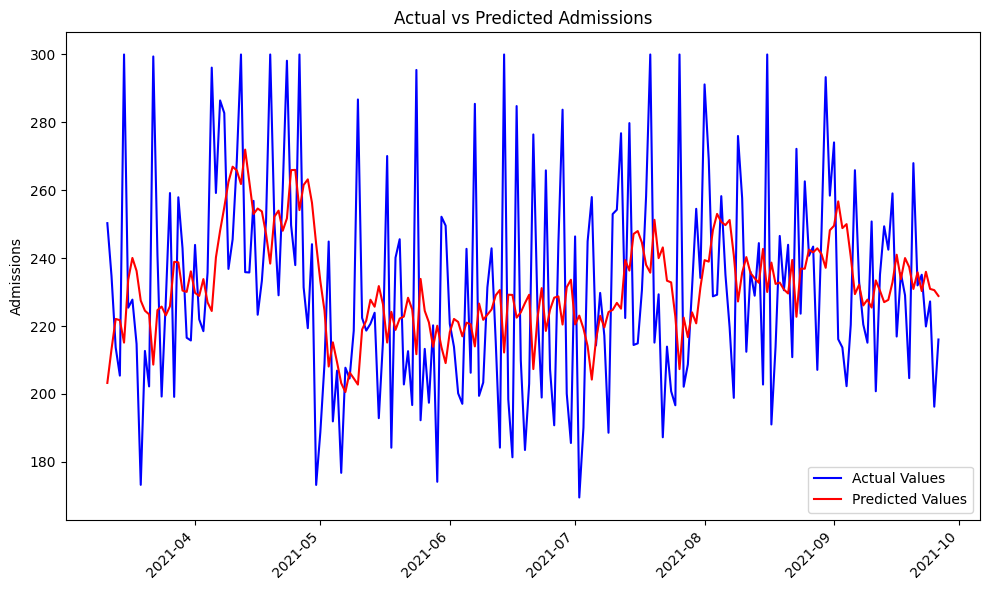

In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

!pip install pmdarima

from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import numpy as np

# Reads the input dataset
fileName = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/patient_admissions.csv"
data = read_csv(fileName, parse_dates=[0], index_col=0)

# split into train and test sets
X = data.values
size = int(len(X) * 0.80)
train, test = list(X[0:size]), list(X[size:len(X)])
test_dates = data.index[size:len(X)]

# This will store our predictions, to be compared to real values
predictions = list()

# Walk-forward training and prediction
for t in range(len(test)):
    model = ARIMA(train, order=(5,1,0))
    model_fit = model.fit()

    output = model_fit.forecast()
    pred = output[0]
    predictions.append(pred)
    obs = test[t]
    train.append(obs)

    print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))

# Evaluate predictions
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE of test set: %.3f' % rmse)

# Plot the real values vs predictions
plt.figure(figsize=(10, 6))
test_dates_array = np.array(test_dates)  # Convert to NumPy array
plt.plot(test_dates_array, test, color='blue', label='Actual Values')
plt.plot(test_dates_array, predictions, color='red', label='Predicted Values')
plt.xticks(rotation=45, ha='right')
plt.title('Actual vs Predicted Admissions')
plt.ylabel('Admissions')
plt.legend()
plt.tight_layout()  # Adjust layout
plt.show()


In [ ]:
# Example using Auto-ARIMA to search for the best parameters at each iteration
#
# WATCH OUT!
# This code takes a LONG time to run (1+ hour)

# Reads the input dataset
fileName = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/patient_admissions.csv"
data = read_csv(fileName, parse_dates=[0], index_col=0)

# split into train and test sets
X = data.values
size = int(len(X) * 0.80)
train, test = list(X[0:size]), list(X[size:len(X)])
test_dates = data.index[size:len(X)]

# This will store our predictions, to be compared to real values
predictions = list()

# Walk-forward training and prediction
for t in range(len(test)):
    # Use auto_arima to find the best ARIMA parameters
    best_model = auto_arima(train, seasonal=True, stepwise=True, max_p=10, max_q=10, max_d=10)

    # Print the best parameters
    print(f'Best ARIMA Parameters: {best_model.order}')

    # Fit the model
    model = ARIMA(train, order=best_model.order)
    model_fit = model.fit()

    output = model_fit.forecast()
    pred = output[0]
    predictions.append(pred)
    obs = test[t]
    train.append(obs)

    print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))

# Evaluate predictions
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE of test set: %.3f' % rmse)

# Plot the real values vs predictions
plt.figure(figsize=(10, 6))
plt.plot(test_dates, test, color='blue', label='Actual Values')
plt.plot(test_dates, predictions, color='red', label='Predicted Values')
plt.xticks(rotation=45, ha='right')
plt.title('Actual vs Predicted Admissions')
plt.ylabel('Admissions')
plt.legend()
plt.show()
plt.tight_layout()


Best ARIMA Parameters: (6, 1, 6)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-e5acebac92c9>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=250.32, Predicted=208.09, 
Best ARIMA Parameters: (5, 1, 8)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-e5acebac92c9>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=234.74, Predicted=203.88, 
Best ARIMA Parameters: (6, 1, 6)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-e5acebac92c9>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=213.70, Predicted=206.66, 
Best ARIMA Parameters: (4, 1, 10)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-e5acebac92c9>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=205.41, Predicted=227.14, 
Best ARIMA Parameters: (3, 1, 5)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-e5acebac92c9>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=300.00, Predicted=228.59, 
Best ARIMA Parameters: (3, 1, 4)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-e5acebac92c9>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=225.42, Predicted=224.31, 
Best ARIMA Parameters: (6, 1, 6)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-e5acebac92c9>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=227.79, Predicted=203.40, 
Best ARIMA Parameters: (3, 1, 4)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-e5acebac92c9>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=214.74, Predicted=229.75, 
Best ARIMA Parameters: (3, 1, 4)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-e5acebac92c9>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=173.23, Predicted=221.34, 
Best ARIMA Parameters: (3, 1, 5)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-e5acebac92c9>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=212.68, Predicted=227.74, 
Best ARIMA Parameters: (5, 1, 8)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-e5acebac92c9>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=202.23, Predicted=215.96, 
Best ARIMA Parameters: (5, 1, 8)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-e5acebac92c9>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=299.42, Predicted=232.44, 
Best ARIMA Parameters: (4, 1, 3)


<ipython-input-4-e5acebac92c9>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=240.94, Predicted=228.69, 
Best ARIMA Parameters: (4, 1, 3)


<ipython-input-4-e5acebac92c9>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Real Value=%.2f, Predicted=%.2f, ' % (obs, pred))


Real Value=199.24, Predicted=226.35, 
